In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
np.set_printoptions(suppress=True)

In [2]:
#function to load the data and randomise it and normalise it further
def loadData():
    df = pd.read_csv('diabetes2.csv', index_col=False)
    df = df.sample(frac=1).reset_index(drop=True)   #shuffling the data
    data=np.array(df,dtype=float)
        
#     print(df)
#     print(data)
    normalise(data)
    x=data[:,:8]
    y=data[:,-1]
#     normalise(x)
#     print(x)
#     print(y)
    return x,y
    

In [3]:
#to normalise data, gets big data into range
def normalise(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
#     print(data)

In [4]:
def train_val_test_split(x,y):
    trainX=[]
    testX=[]
    trainY=[]
    testY=[]
    valX=[]
    valY=[]
    #we have train:val:test = 7:2:1
    trainFreq=int((7/10)*x.shape[0])
    valFreq=int((2/10)*x.shape[0])
    for i in range(trainFreq):
        trainX.append(x[i])
        trainY.append(y[i])
    for i in range(trainFreq,trainFreq+valFreq):
        valX.append(x[i])
        valY.append(y[i])
    for i in range(trainFreq+valFreq,x.shape[0]):
        testX.append(x[i])
        testY.append(y[i])
    
    return np.array(trainX),np.array(trainY),np.array(valX),np.array(valY),np.array(testX),np.array(testY)
    

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def cost(x,y,theta):
    m=x.shape[0]
    return (-1*((y.T@np.log(sigmoid(x@theta))) + (1-y).T @ np.log(1 - sigmoid(x@theta)))/m)

In [42]:
#performing gradient decent to find the minimal cost
def gradientDecent(x,y,theta,learningRate,epoch,valX,valY,typeGD):
    
    m=x.shape[0]  #number of entries in data
    allJ=[]
    allJVal=[]
    if(typeGD=='bgd'):
        for i in range(epoch):
            tempCost=(x.T@(sigmoid(x@theta)-y))/m
    #         print("tempcost",tempCost.shape)
            theta-=(learningRate)*tempCost
            allJ.append(cost(x,y,theta)[0][0])
            allJVal.append(cost(valX,valY,theta)[0][0])

        return theta, allJ, allJVal
    else:
        for i in range(epoch):
            point=random.randint(0,x.shape[0]-1)
            number_of_rows = x.shape[0]
            random_indices = np.random.choice(number_of_rows-1, replace=False)
            random_row = x[random_indices]
#             print(random_row)
#             print(random_row.shape)
            random_row=np.reshape(random_row,(1,-1))
#             print(random_row)
#             print(random_row.shape)
            tempCost=(random_row.T@(sigmoid(random_row@theta)-y[point]))/m
    #         print("tempcost",tempCost.shape)
            theta-=(learningRate)*tempCost
#             op=random.randint(0,len(x)-1)
#             number_of_rows = x.shape[0]
#             random_indices = np.random.choice(number_of_rows, replace=False)
#             random_row = x[random_indices, :]

#             des = sigmoid(np.matmul(random_row ,theta.T))
#             cos = np.sum(random_row * (des - y[op]), axis=0)
#             theta = theta -learningRate * cos
            allJ.append(cost(x,y,theta)[0][0])
            allJVal.append(cost(valX,valY,theta)[0][0])
            

        return theta, allJ, allJVal
            
            

In [58]:
def logisticRegression(learningRate,trainingX,trainingY,validatingX,validatingY):
    
    theta=np.zeros((trainingX.shape[1],1))
    theta, allJ, allJVal = gradientDecent(trainingX,trainingY,theta,learningRate,1000,validatingX,validatingY,'bgd') #we have a learning rate of 0.1 and 100000 epoch

    J=cost(trainingX,trainingY,theta)
    JVal=cost(validatingX,validatingY,theta)
    print("The data below is for a learning rate = ",learningRate)
    print("cost training: ",J[0][0])
    print("parameters: ", theta)
    print("cost validating",JVal[0][0])
    
    allJ=np.array(allJ)
    allJVal=np.array(allJVal)
    # print(allJ)
    plt.plot(allJ)
    plt.title("loss vs epoch for training set")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(allJVal)
    plt.title("loss vs epoch for validating set")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    print("-----------------------------------\n\n")
    return theta


(768, 8)
(768, 1)
(153, 9)
The data below is for a learning rate =  0.1
cost training:  0.4552904036602819
parameters:  [[-0.89163378]
 [ 0.51427101]
 [ 1.16672983]
 [-0.25074931]
 [ 0.04118175]
 [-0.28305757]
 [ 0.77924645]
 [ 0.28769355]
 [ 0.20559481]]
cost validating 0.5422576921618736


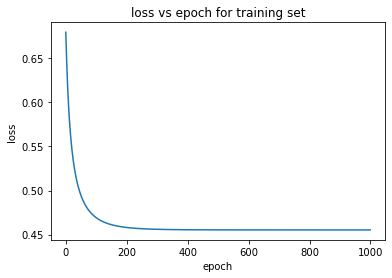

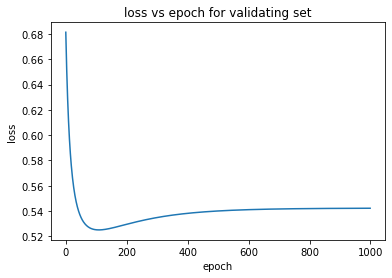

-----------------------------------




In [59]:
#performing logistic regression by invoking all the functions
x,y = loadData()
# print(x.shape)
# print(y.shape)
y=np.reshape(y,(-1,1))
print(x.shape)
print(y.shape)
x = np.hstack((np.ones((x.shape[0],1)),x)) #adding a column of 1s for matrix multiplication
trainingX,trainingY,validatingX,validatingY,testingX,testingY = train_val_test_split(x,y)
print(validatingX.shape)

thetaImp=logisticRegression(0.1,trainingX,trainingY,validatingX,validatingY)


The data below is for a learning rate =  0.01
cost training:  0.6925395690570011
parameters:  [[-0.00250775]
 [ 0.00000005]
 [ 0.00059898]
 [ 0.00044712]
 [-0.00000143]
 [ 0.00048257]
 [-0.00000182]
 [-0.0000369 ]
 [ 0.00025192]]
cost validating 0.6926142821520687


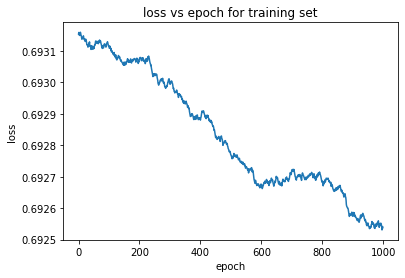

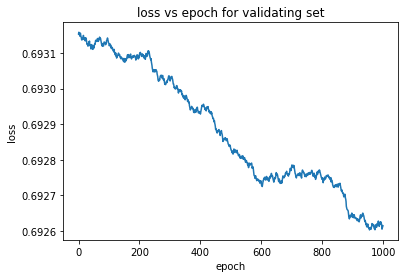

-----------------------------------




In [55]:
testTheta=logisticRegression(0.01,trainingX,trainingY,validatingX,validatingY)

The data below is for a learning rate =  0.0001
cost training:  0.6931390551075816
parameters:  [[-0.00003222]
 [-0.00000021]
 [ 0.00000539]
 [ 0.00000766]
 [ 0.00000576]
 [ 0.00000233]
 [ 0.00000477]
 [ 0.00000302]
 [ 0.0000022 ]]
cost validating 0.6931401327996085


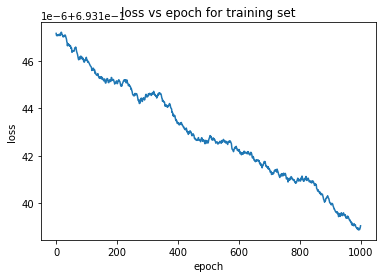

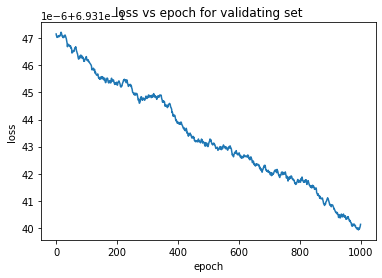

-----------------------------------




In [56]:
testTheta1=logisticRegression(0.0001,trainingX,trainingY,validatingX,validatingY)

The data below is for a learning rate =  10
cost training:  0.6441558765567613
parameters:  [[-0.80072421]
 [-0.21226455]
 [ 0.14949687]
 [ 0.13101416]
 [-0.06929477]
 [-0.0861747 ]
 [ 0.03190242]
 [-0.00065625]
 [ 0.01562031]]
cost validating 0.6452055174577365


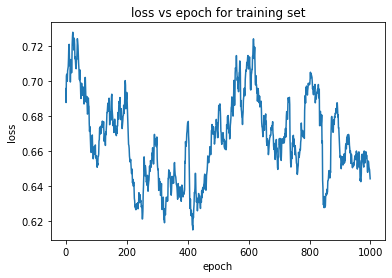

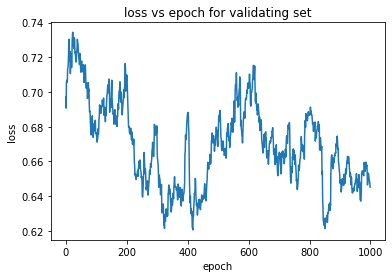

-----------------------------------




In [57]:
testTheta2=logisticRegression(10,trainingX,trainingY,validatingX,validatingY)

In [60]:
def test(theta, x):
    if(sigmoid(x@theta)>=0.5):
        return 1
    else:
        return 0

In [61]:
testSize = testingX.shape[0]
TP=0
FP=0
TN=0
FN=0

for i in range(testSize):
    outcome = test(thetaImp,testingX[i])
    if(outcome==1 and outcome==testingY[i]):
        TP+=1
    elif(outcome==1 and outcome!=testingY[i]):
        FP+=1
    elif(outcome==0 and outcome==testingY[i]):
        TN+=1
    else:
        FN+=1

print(TP,FP,TN,FN)


    




17 7 44 10


In [62]:
confusion=[[TP,FP],[TN,FN]]
confusionMatrix=np.array(confusion)
print("Confusion matrix we get is ")
print(confusionMatrix)


recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy = (TP+TN)/testSize
fMeasure = (2*recall*precision)/(recall+precision)

print("Recall = ",recall)
print("Precision = ",precision)
print("accuracy = ",accuracy)
print("f1Measure = ",fMeasure)

Confusion matrix we get is 
[[17  7]
 [44 10]]
Recall =  0.6296296296296297
Precision =  0.7083333333333334
accuracy =  0.782051282051282
f1Measure =  0.6666666666666667


In [74]:
regression = LogisticRegression(max_iter=25)
regression.fit(trainingX,trainingY)
yPred=regression.predict(testingX)
print(confusion_matrix(testingY, yPred))

[[45  6]
 [10 17]]


c:\users\utkarsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [76]:
print("Confusion Matrix - ",confusion_matrix(testingY, yPred))
print("Accuracy using sklearn :",accuracy_score(testingY,yPred))
print("Precision using sklearn:",precision_score(testingY, yPred))
print("Recall using sklearn:",recall_score(testingY, yPred))
print("f1 score using sklearn:",f1_score(testingY, yPred))

Confusion Matrix -  [[45  6]
 [10 17]]
Accuracy using sklearn : 0.7948717948717948
Precision using sklearn: 0.7391304347826086
Recall using sklearn: 0.6296296296296297
f1 score using sklearn: 0.68
